# Decision Tree Visualization

In this notebook we visualize a shallow depth decision tree to showcase the classification process followed by algorithms using this approach

In [1]:
import graphviz
import pydotplus
import collections
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image
from ipynb.fs.full.WFML_Utilities import wfml

## Loads Data & Runs classifier

In [2]:
df = pd.read_csv(wfml.get_filepath('train'))

X = df[wfml.features]
y = df[wfml.target]

clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf = clf.fit(X, y)

## Creates Tree Graph

In [3]:
dot_data = tree.export_graphviz(clf,
                                class_names = ['no-fire', 'fire'],
                                feature_names = wfml.features,
                                out_file = None,
                                node_ids = True,
                                proportion = True,
                                filled = True,
                                special_characters = True,
                                rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data)

## Creates Colors for Classes

In [4]:
colors = ('#1792EA', '#E86E17')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        gini = dest.get_attributes()['label'].partition('gini = ')[2].partition('<br/>samples')[0]
        dest.set_fillcolor(colors[i] + wfml.gini_to_alpha(gini))

# Remove Unintended Shapes


In [5]:
for node in graph.get_node_list():
    if node.get_name() == '"\\n"':
        graph.del_node(node.get_name())

## Prints Tree Graph

In [6]:
img_path = wfml.get_filepath('image', 'tree')
graph.write_png(img_path)

True

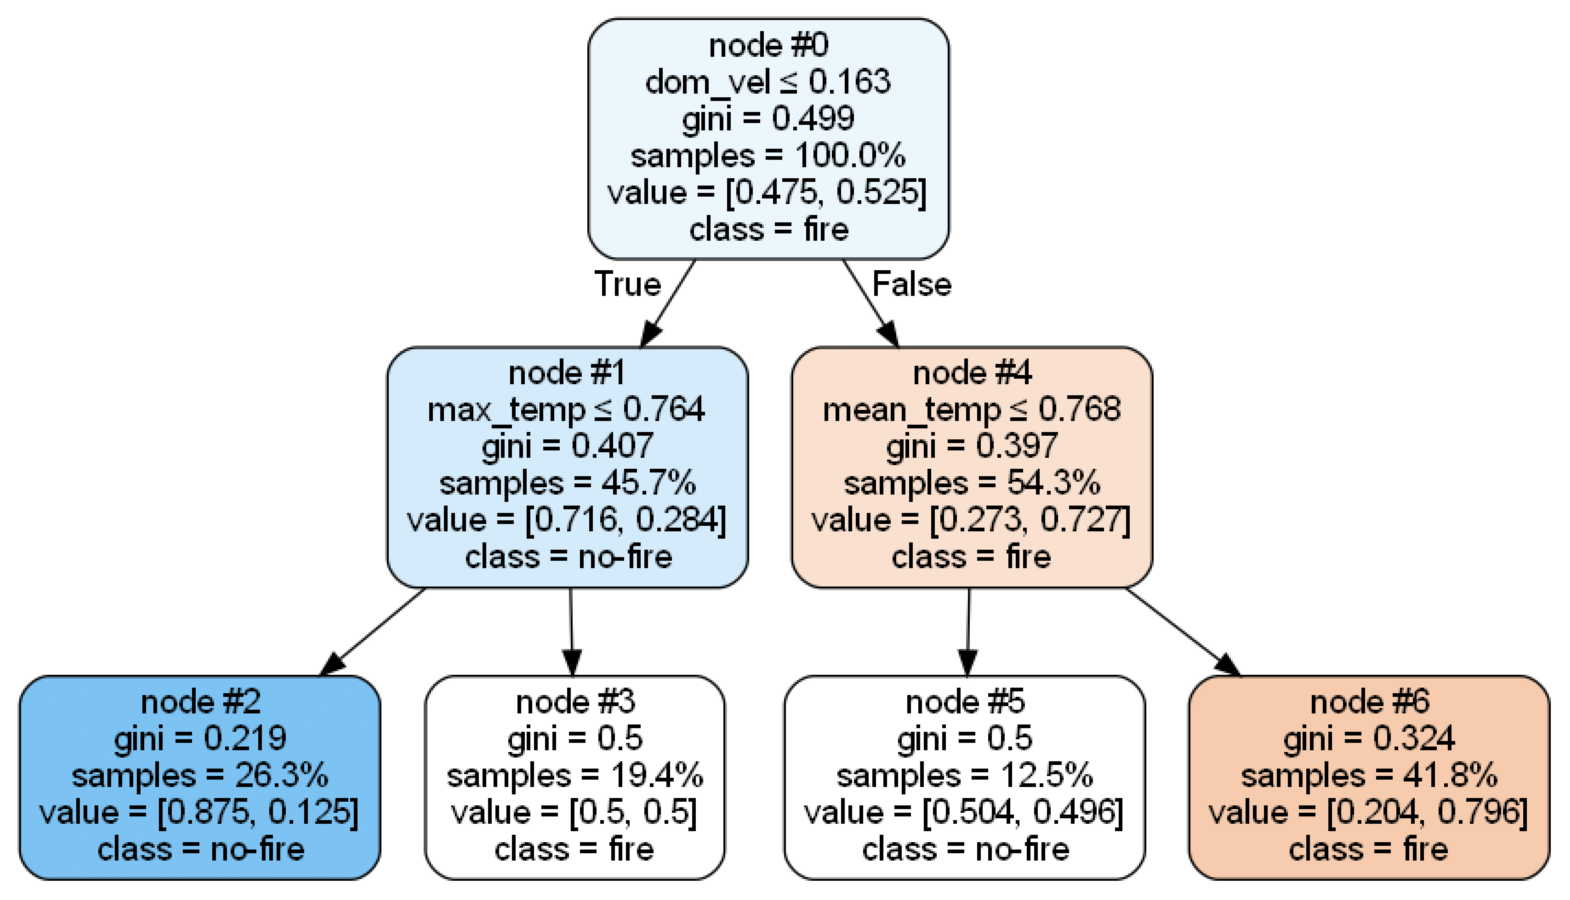

In [7]:
# Display the image in the notebook
img = mpimg.imread(img_path)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()